In [ ]:
from google.colab import drive
import sys
drive.mount("/content/drive", force_remount=True)
root  = '/content/drive/My Drive/projeto'
sys.path.append(root)

Mounted at /content/drive


In [ ]:
!pip install feature_selector

[ True  True  True False  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True False  True  True False False  True  True
 False False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True  True False  True False  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True False
  True False False False  True  True  True  True  True  True  True False
 False False  True  True  True  True  True  True  True  True  True False
 False False False  True  True  True  True  True  True  True  True  True
  True False False  True False  True  True  True]
0 features with greater than 0.60 missing values.

0 features with a singl

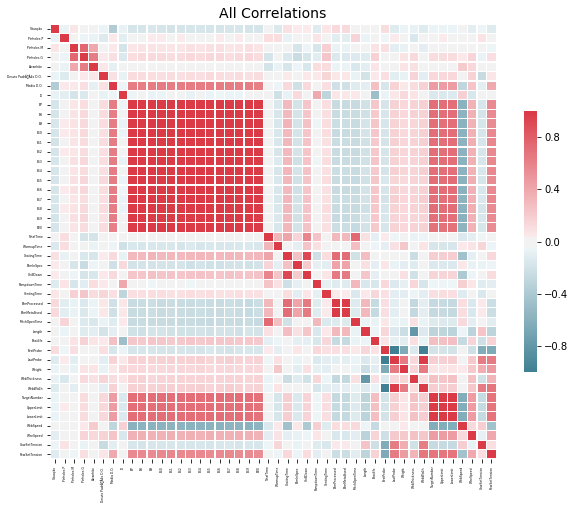

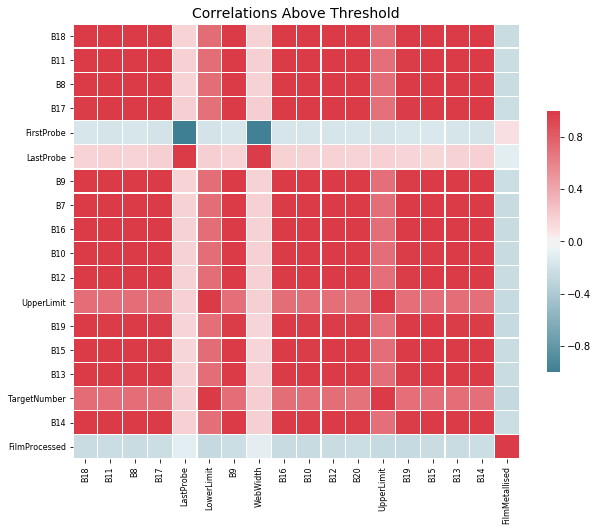

In [ ]:
from feature_selector import FeatureSelector
import pandas as pd
from scipy.stats import zscore
import numpy as np
import pandas

train = pd.read_csv('/content/drive/My Drive/projeto/overall4backup.csv',encoding='ISO-8859-1',sep = ';')
z_scores = zscore(train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
new_overall = train[filtered_entries]
train = pandas.DataFrame(new_overall)
train_labels = train['Situação']
train.head()
fs = FeatureSelector(data = train, labels = train_labels)
train = train.drop(columns = ['Situação'])
fs.identify_missing(missing_threshold=0.6)
missing_features = fs.ops['missing']
missing_features[:10]
fs.missing_stats.head(10)
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
fs.identify_collinear(correlation_threshold=0.975)
correlated_features = fs.ops['collinear']
fs.plot_collinear(plot_all=True),fs.plot_collinear()
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
one_hot_features = fs.one_hot_features
base_features = fs.base_features
zero_importance_features = fs.ops['zero_importance']
train_no_missing = fs.remove(methods = ['missing'])
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])
all_to_remove = fs.check_removal()
train_removed = fs.remove(methods = 'all')
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])
result = pd.concat([train_removed_all, train_labels], axis=1, sort=False)


In [ ]:
!fusermount -u drive
!google-drive-ocamlfuse drive
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive', force_remount=True)


# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/overallprocessed.csv', 'w') as f:
  result.to_csv(f)

/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /gdrive
